In [ ]:
from tika import parser
import datefinder
import numpy as np

file = r'/content/resume.pdf'
file_data = parser.from_file(file)
text = file_data['content']
text = text.strip().upper()

print(text)

KRITIKA RUPAULIHA EMAIL : RKRITIKA1508@GMAIL.COM
LINKEDIN: KRITIKA-RUPAULIHA MOBILE : (+91)6264610385

EDUCATION

• ITM GROUP OF INSTITUTIONS GWALIOR, INDIA
BACHELOR OF TECHNOLOGY IN COMPUTER SCIENCE AND ENGINEERING; GPA: 8.42/10.0; SILVER MEDALLIST 2017 - 2021

◦ COURSEWORK: DATA STRUCTURES, ALGORITHMS, OBJECT-ORIENTED PROGRAMMING, SOFTWARE ENGINEERING, OPERATING SYSTEMS,
DATABASES, DATA ANALYTICS, MACHINE LEARNING, WEB TECHNOLOGIES, COMPUTER NETWORKS, PROJECT MANAGEMENT

◦ ACTIVITIES AND LEADERSHIP: GOOGLE EXPLORE ML FACILITATOR, SCHOOL OF AI CORE, STUDENT COUNCIL, CLASS REPRESENTATIVE

EXPERIENCE

• SOFTWARE ENGINEERING INTERN, MICROSOFT MAY 2020 - PRESENT
◦ DATA COLLECTION: AGGREGATED DATA FROM AZURE STORAGE QUEUE AND ADO GIT REST APIS TO COLLECT METADATA ABOUT

BYPASSED PULL REQUESTS.

◦ ANOMALY DETECTION: IMPLEMENTED CHECKS AND AUTOMATED CODE REVIEWS TO DETECT ANOMALIES IN OFFICE CODE CHECKINS.
CREATED A POWER BI DASHBOARD TO DISPLAY THE RESULTS.

◦ MACHINE LEARNING: ANALYSED THE

min and max yrs diff for experience
choose not isalpha() for number of projects
until one or two words are found in sentence-for project section

In [ ]:
# Number of projects
def project(text):
  num1 = text.find("PROJECTS")
  num2 = text.find("PROGRAMMING SKILLS")
  pro = text[num1:num2].split("\n")
  pro = [i for i in pro if i]
  count=0
  for l in range(len(pro)):
    if not pro[l][0].isalpha():
      count+=1
  return count

In [ ]:
project(text)

5

In [ ]:
# Years of Experience
def exp(text):
  num1 = text.find("EXPERIENCE")
  num2 = text.find("PROJECTS")
  experience = text[num1:num2]
  matches = datefinder.find_dates(experience)
  yrs=[]
  for match in matches:
    yrs.append(match.year)
  exp = (max(yrs)-min(yrs))+1
  return exp

In [ ]:
exp(text)

2

In [ ]:
# Years of Education
def edu(text):
  num1 = text.find("EDUCATION")
  num2 = text.find("EXPERIENCE")
  education = text[num1:num2].split("\n")
  education = [i for i in education if i]

  yrs = []
  for l in education:
    l = re.findall(r'(\d{4}) - (\d{4})', l)
    l = [list(map(int,i)) for i in l]
    yrs.append(l)
  yrs = [i for i in yrs if i]
  
  yrs = np.array(yrs)
  yrs = yrs.ravel()
  exp = (max(yrs)-min(yrs))
  return exp 

In [ ]:
edu(text)

4

#DATA ANALYSIS

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

from patsy import dmatrices
import pickle

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

#Data Visualisation

				 satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, Length: 92, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


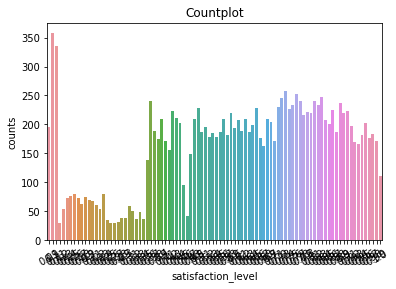




				 last_evaluation
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


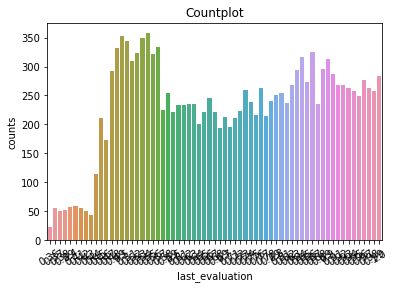




				 number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


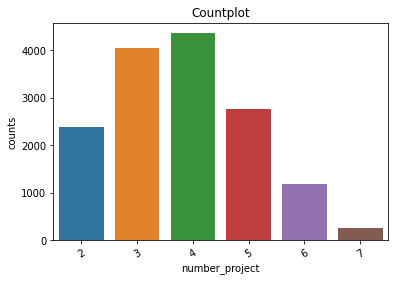




				 average_montly_hours
156    153
135    153
149    148
151    147
160    136
      ... 
297      7
303      6
288      6
299      6
96       6
Name: average_montly_hours, Length: 215, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


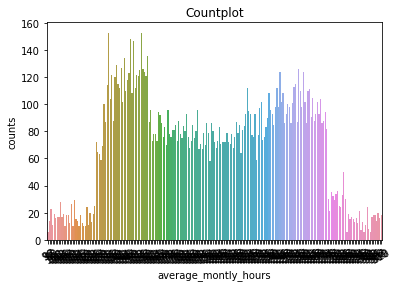




				 time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


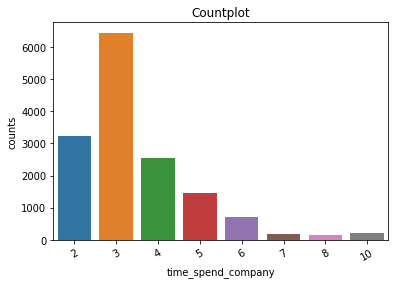




				 Work_accident
0    12830
1     2169
Name: Work_accident, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


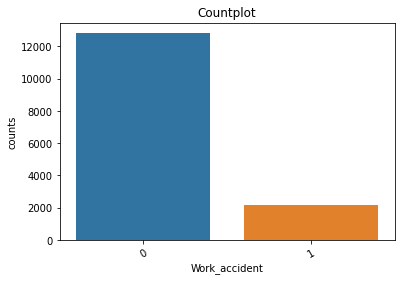




				 left
0    11428
1     3571
Name: left, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


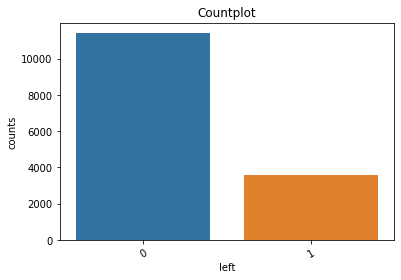




				 promotion_last_5years
0    14680
1      319
Name: promotion_last_5years, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


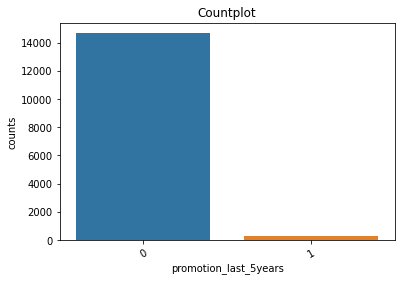




				 sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


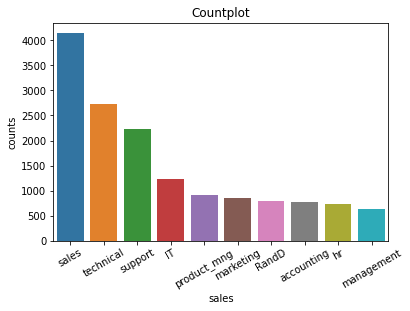




				 salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


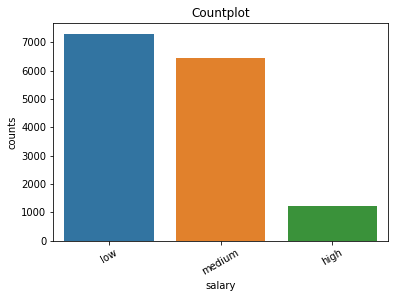

In [7]:
for i in df.columns:
    print('\t\t\t\t',i)
    print(df[i].value_counts())
    plt.title('Countplot')
    plt.ylabel('counts')
    plt.xlabel(i)
    sns.barplot(df[i].value_counts().index[:] , df[i].value_counts().values[:])
    plt.xticks(rotation=30)
    # plt.tight_layout()
    plt.show()
    print('\n\n')

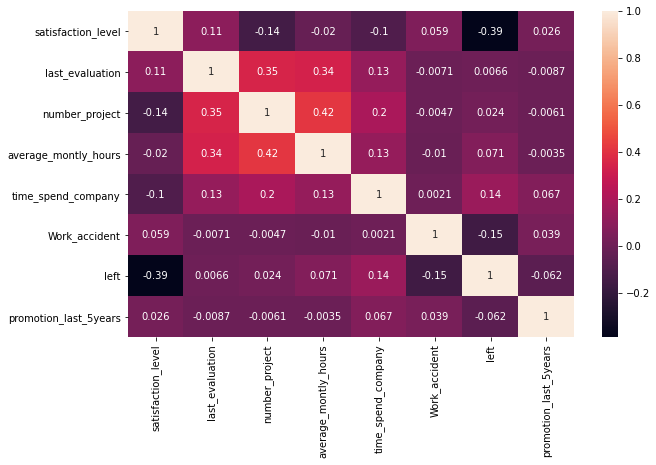

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() , annot =True)

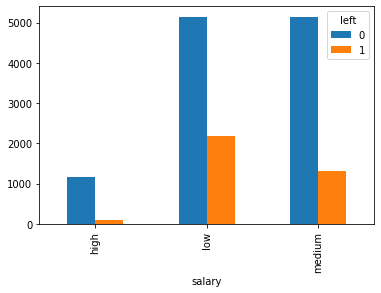

In [9]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.show()

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


salary
high      1237
low       7316
medium    6446
dtype: int64


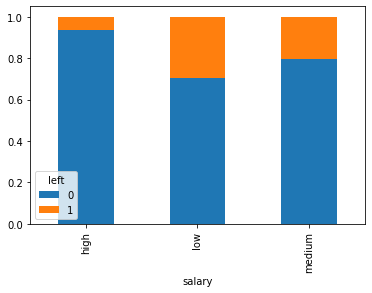

In [10]:
q = pd.crosstab(df.salary, df.left)
print(q)
print('\n')
print(q.sum(1))
q.div(q.sum(1), axis = 0).plot(kind='bar', stacked = True)
plt.show()

In [11]:
# Using dmatrices to generate dummy variables

y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', df, return_type='dataframe')
# X.head()
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'}) 
y = np.ravel(y)

#Model Training

In [15]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.2, random_state=0, )
model = LogisticRegression()
model.fit(Xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))))

                                 0                       1
0                        Intercept  [-0.35189658458835993]
1               Department: Random  [-0.45463587907338876]
2           Department: Accounting    [0.1603979155141592]
3                   Department: HR    [0.3818910479617436]
4           Department: Management   [-0.5025997927844744]
5            Department: Marketing   [0.03927312654362365]
6   Department: Product_Management  [0.017535080540682833]
7                Department: Sales   [0.01006156760529475]
8              Department: Support   [0.29383925643476305]
9            Department: Technical   [0.26784084892673543]
10                     Salary: Low    [1.3829081026174745]
11                  Salary: Medium    [0.8339312920974113]
12              satisfaction_level    [-4.069620712445086]
13                 last_evaluation   [0.14199182365919766]
14                  number_project  [-0.29447466261063326]
15            average_montly_hours  [0.00453472128949725

In [17]:
pred = model.predict(Xtest)
metrics.accuracy_score(ytest, pred)

0.7996666666666666

In [23]:
#sklearn.metrics.classification_report(y_true, y_pred)
print(metrics.classification_report(ytest, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      2299
         1.0       0.61      0.38      0.47       701

    accuracy                           0.80      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.78      0.80      0.78      3000



#CREATING PICKLE FILE

In [18]:
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, ytest)
print(result)

0.7996666666666666


In [20]:
# use trained model to predict an example
loaded_model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0, 0.5, 0.7, 4.0, 160, 3.0, 0, 0]])

array([[0.87578489, 0.12421511]])